In [14]:
import sys
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append('/home/jshe/prop-pred/src/data')
from data_utils.datasets import SmilesDataset
from data_utils.graphs import smiles_to_graphs

from gin import GINTransformer

import torch
import torch.nn as nn
from torch.utils.data import random_split, DataLoader

from sklearn.metrics import r2_score

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data

In [7]:
dataset = SmilesDataset(
    smiles='/home/jshe/prop-pred/src/data/qm9/smiles.csv', 
    y='/home/jshe/prop-pred/src/data/qm9/norm_y.csv', 
    d = '/home/jshe/prop-pred/src/data/qm9/distances.npy'
)

train_dataset, validation_dataset, test_dataset = random_split(
    dataset, lengths=(0.8, 0.1, 0.1), 
    generator=torch.Generator().manual_seed(8)
)

In [8]:
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=2048, shuffle=True)

## Model

In [20]:
hyperparameters = dict(
    numerical_features=5, categorical_features=(9+1, 8+1, 2+1, 2+1), 
    E=64, H=2, stack=8, 
    dropout=0.1, 
    out_features=dataset.n_properties, 
)

model = GINTransformer(**hyperparameters).to(device)

In [21]:
sum(p.numel() for p in model.parameters())

402383

## Visualization

In [12]:
logs = [
    './logs/gin.csv'
]

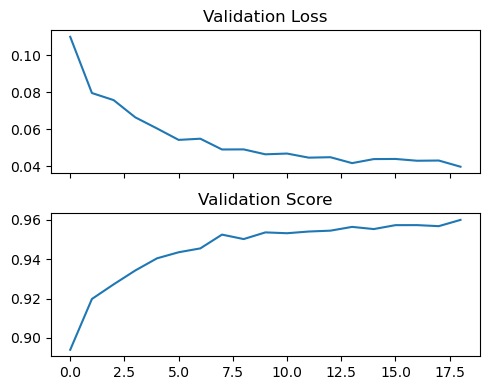

In [17]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(5, 4), sharex=True)

for i, log in enumerate(logs):
    log = pd.read_csv(log)

    ax0.plot(log['validation_mse'])
    ax1.plot(log['validation_r2'])

ax0.set_title('Validation Loss')
ax1.set_title('Validation Score')

plt.tight_layout()